# Import Libraries

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv('cleaned_data.csv')

In [99]:
df

,units_sold,discount_applied,revenue,clicks,impressions,conversion_rate,category,region,ad_ctr,ad_cpc,ad_spend,transaction_date_update
0,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90,Oct-2024
1,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56,Oct-2024
2,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40,Apr-2024
3,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54,Aug-2024
4,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31,May-2024
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,0.20,173.70,23,299,0.08,Books,North America,0.1459,0.54,78.79,Oct-2024
4996,151,0.20,61.13,19,440,0.04,Clothing,Asia,0.1036,1.21,125.36,Jan-2024
4997,174,0.04,274.68,11,10,1.10,Toys,Europe,0.1758,1.16,203.93,Oct-2024
4998,180,0.12,51.23,12,490,0.02,Books,North America,0.0853,0.28,23.88,Feb-2024


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   units_sold               5000 non-null   int64  
 1   discount_applied         5000 non-null   float64
 2   revenue                  5000 non-null   float64
 3   clicks                   5000 non-null   int64  
 4   impressions              5000 non-null   int64  
 5   conversion_rate          5000 non-null   float64
 6   category                 5000 non-null   object 
 7   region                   5000 non-null   object 
 8   ad_ctr                   5000 non-null   float64
 9   ad_cpc                   5000 non-null   float64
 10  ad_spend                 5000 non-null   float64
 11  transaction_date_update  5000 non-null   object 
dtypes: float64(6), int64(3), object(3)
memory usage: 468.9+ KB


In [101]:
df['transaction_date_update'] = pd.to_datetime(df['transaction_date_update'])

In [102]:
df.isna().sum()

,0
units_sold,0
discount_applied,0
revenue,0
clicks,0
impressions,0
conversion_rate,0
category,0
region,0
ad_ctr,0
ad_cpc,0


In [103]:
df.duplicated().sum()

np.int64(0)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   units_sold               5000 non-null   int64         
 1   discount_applied         5000 non-null   float64       
 2   revenue                  5000 non-null   float64       
 3   clicks                   5000 non-null   int64         
 4   impressions              5000 non-null   int64         
 5   conversion_rate          5000 non-null   float64       
 6   category                 5000 non-null   object        
 7   region                   5000 non-null   object        
 8   ad_ctr                   5000 non-null   float64       
 9   ad_cpc                   5000 non-null   float64       
 10  ad_spend                 5000 non-null   float64       
 11  transaction_date_update  5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), 

# EDA

## Heatmap Correlation

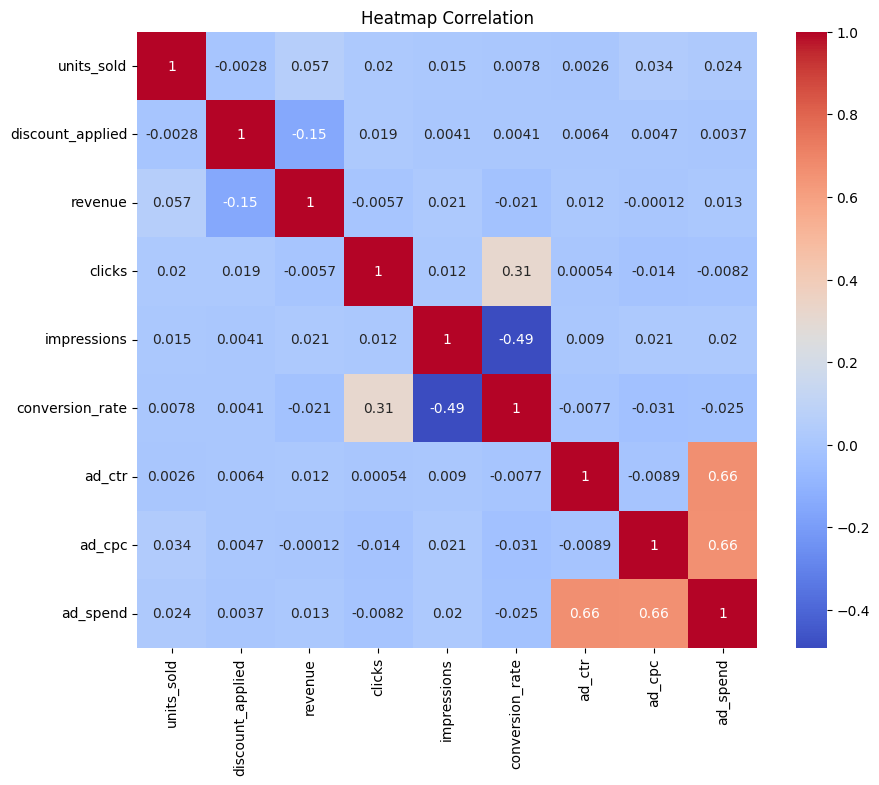

In [105]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Correlation")
plt.show()

## Numerical Features Distribution

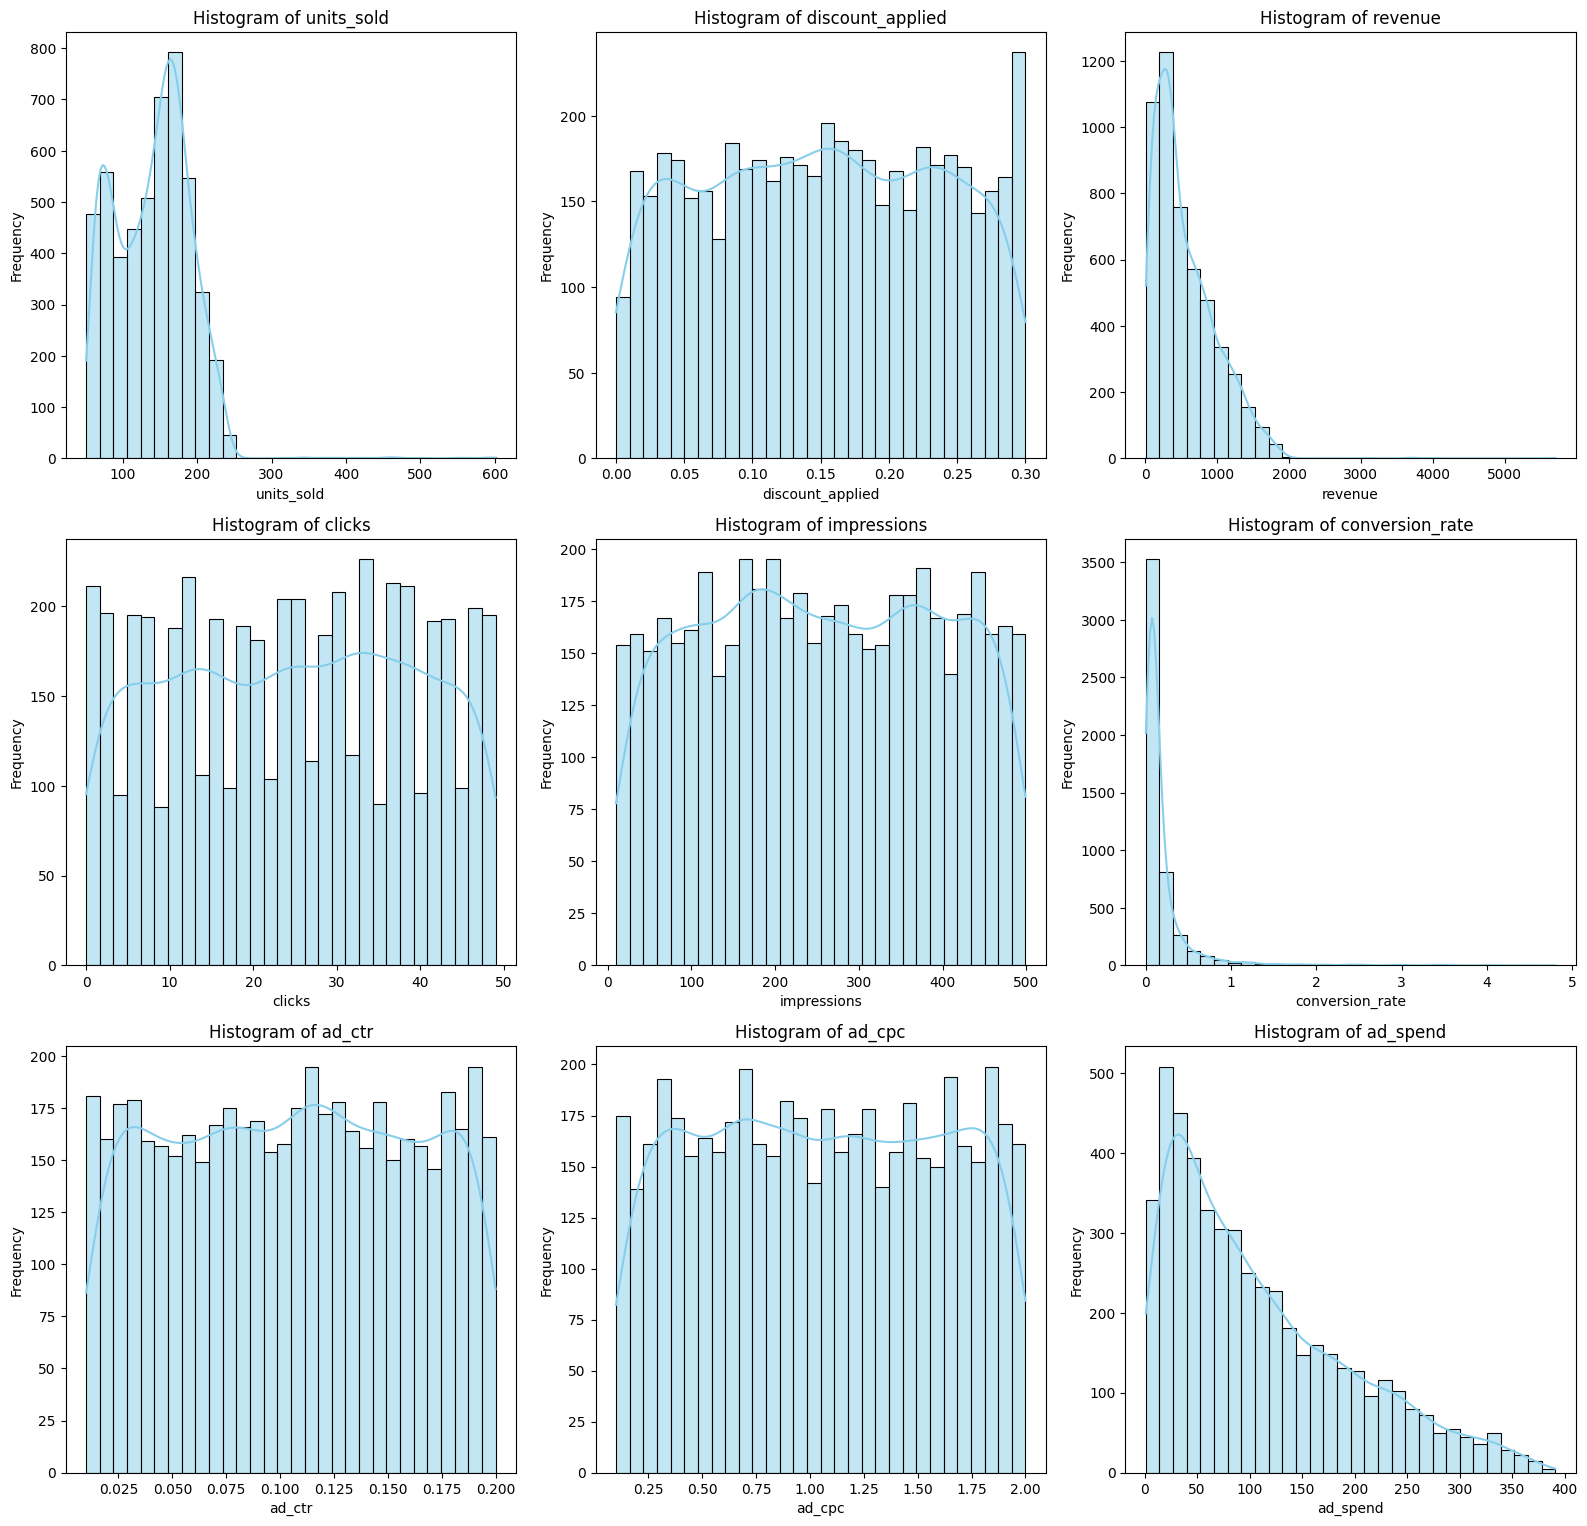

In [106]:
numeric_cols = [
    'units_sold', 'discount_applied', 'revenue',
    'clicks', 'impressions', 'conversion_rate',
    'ad_ctr', 'ad_cpc', 'ad_spend'
]

plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# EDA - Product

## Total Transactions per Category

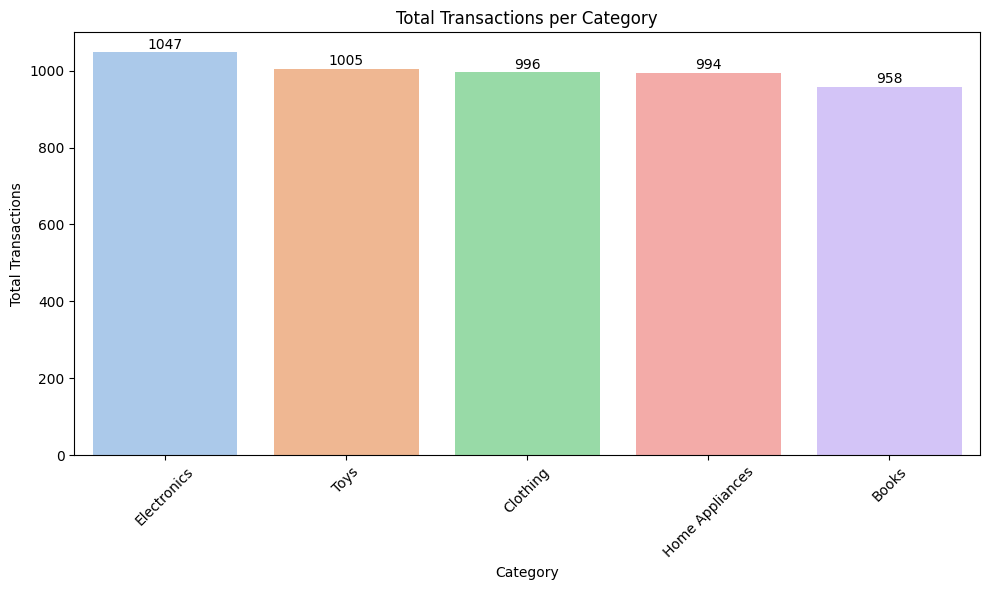

In [107]:
category_counts = df['category'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='pastel')
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.title("Total Transactions per Category")
plt.xlabel("Category")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Revenue per Category

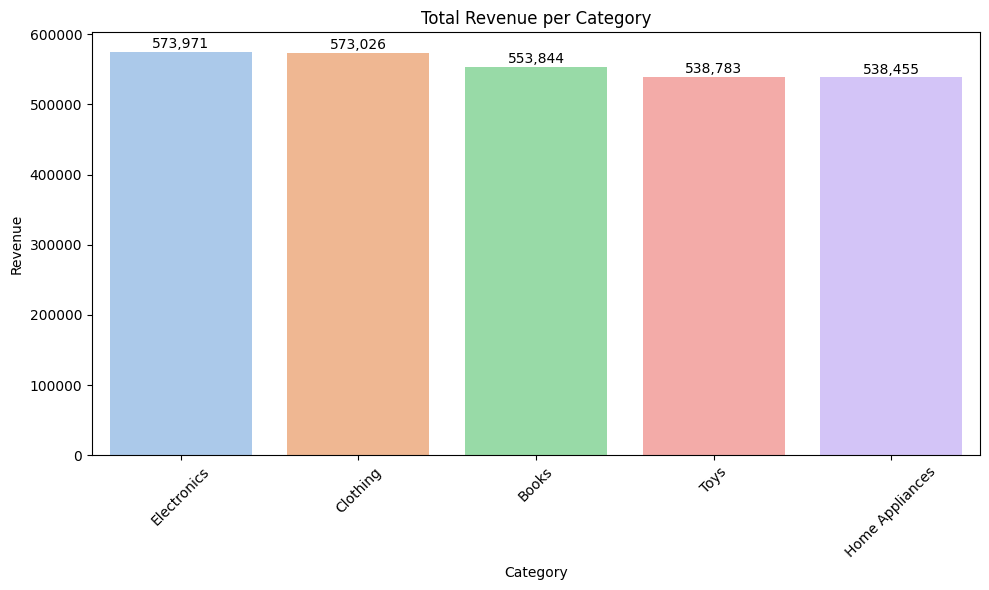

In [108]:
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette='pastel')
for i, v in enumerate(category_revenue.values):
    plt.text(i, v + v*0.01, f"{v:,.0f}", ha='center')
plt.title("Total Revenue per Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Total Unit Solds per Category

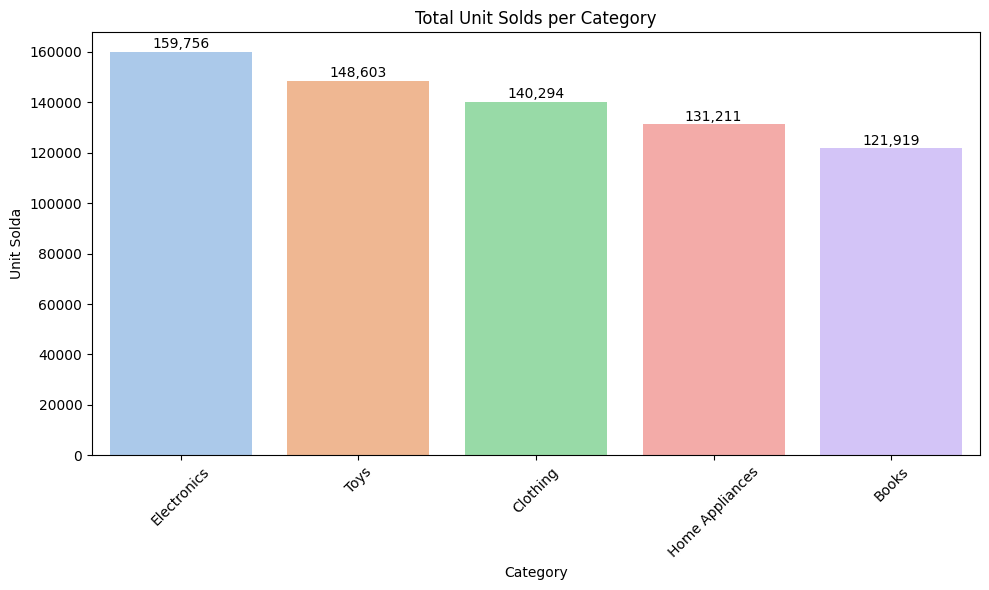

In [109]:
category_units = df.groupby('category')['units_sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_units.index, y=category_units.values, palette='pastel')
for i, v in enumerate(category_units.values):
    plt.text(i, v + v*0.01, f"{v:,}", ha='center')
plt.title("Total Unit Solds per Category")
plt.xlabel("Category")
plt.ylabel("Unit Solda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insight (Category)

* Clothing has almost the same revenue as Electronics, but fewer transactions, indicating a higher average transaction value.

* Books is only ranked 5th in transactions, but is ranked 3rd in revenue -> possibly because the product price is higher per transaction.

* Books is at the bottom in terms of units sold, despite its high revenue. This indicates a higher price per unit compared to Toys and Home Appliances.

## Total Unit Solds per Months

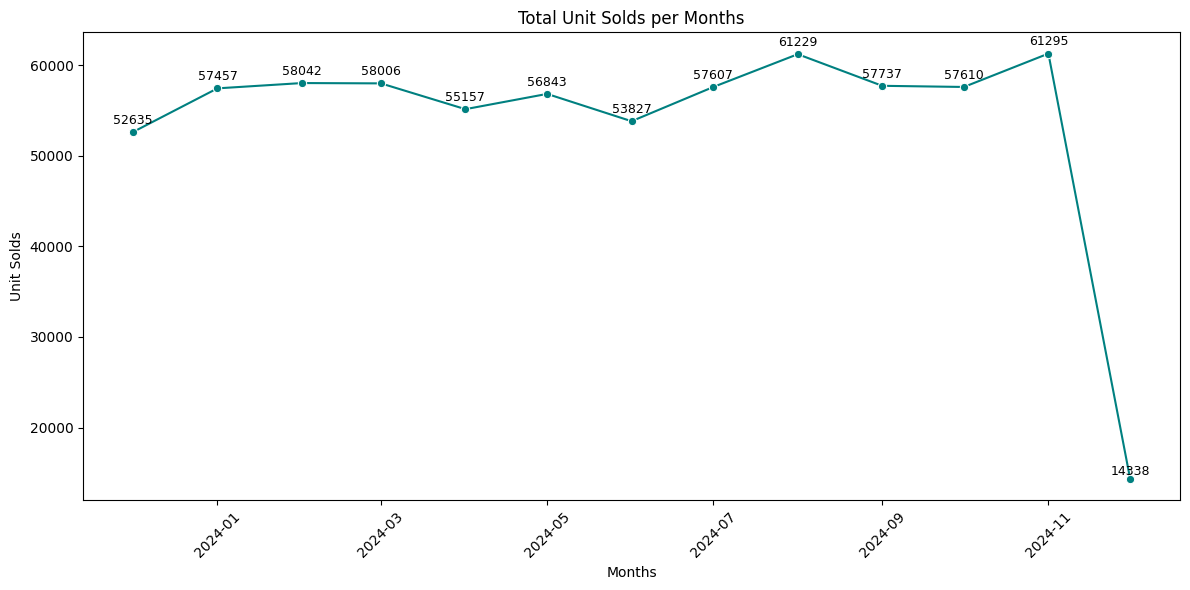

In [110]:
sold_date = df.groupby('transaction_date_update')['units_sold'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sold_date.index, y=sold_date.values, marker='o', color='teal')

for x, y in zip(sold_date.index, sold_date.values):
    plt.text(x, y + y*0.01, f"{int(y)}", ha='center', va='bottom', fontsize=9)

plt.title("Total Unit Solds per Months")
plt.xlabel("Months")
plt.ylabel("Unit Solds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
sold_date.reset_index()

,transaction_date_update,units_sold
0,2023-12-01,52635
1,2024-01-01,57457
2,2024-02-01,58042
3,2024-03-01,58006
4,2024-04-01,55157
5,2024-05-01,56843
6,2024-06-01,53827
7,2024-07-01,57607
8,2024-08-01,61229
9,2024-09-01,57737


## Total Revenue per Months

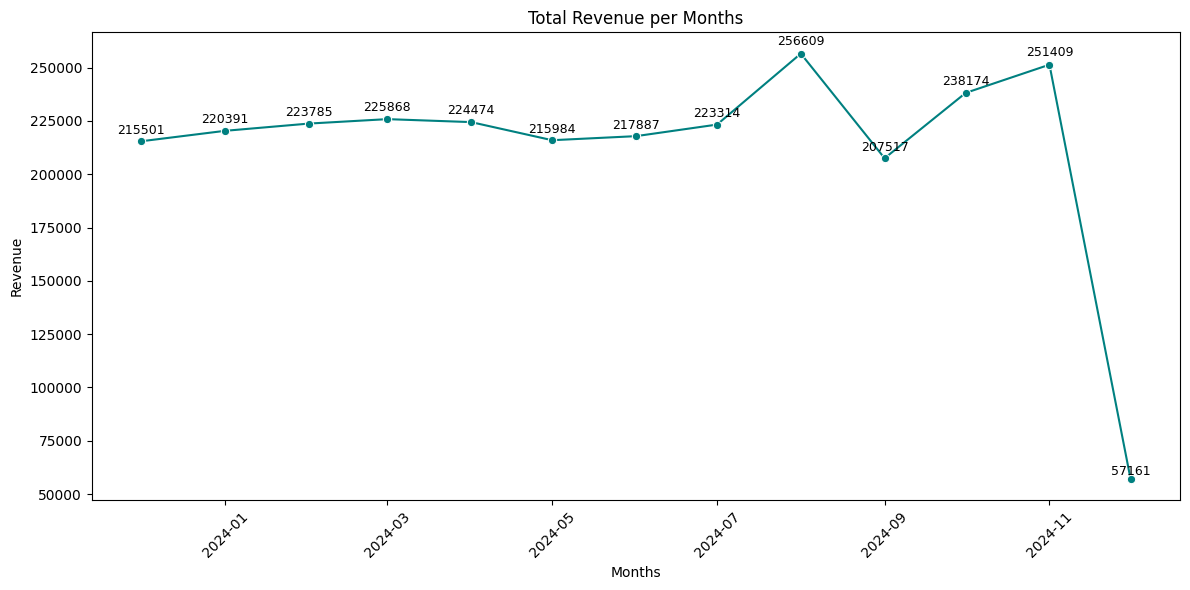

In [112]:
rev_date = df.groupby('transaction_date_update')['revenue'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=rev_date.index, y=rev_date.values, marker='o', color='teal')

for x, y in zip(rev_date.index, rev_date.values):
    plt.text(x, y + y*0.01, f"{int(y)}", ha='center', va='bottom', fontsize=9)

plt.title("Total Revenue per Months")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [113]:
rev_date.reset_index()

,transaction_date_update,revenue
0,2023-12-01,215501.61
1,2024-01-01,220391.33
2,2024-02-01,223785.42
3,2024-03-01,225868.46
4,2024-04-01,224474.88
5,2024-05-01,215984.87
6,2024-06-01,217887.01
7,2024-07-01,223314.39
8,2024-08-01,256609.15
9,2024-09-01,207517.02


## Insight (Months)

* The highest sales occurred at the end of Q3 and Q4 → probably related to seasonal promotions such as Back-to-School (August) or pre-Holiday (November).

* The revenue pattern follows the unit sold trend, confirming that quantity greatly influences revenue.

## Total Unit Solds per Region

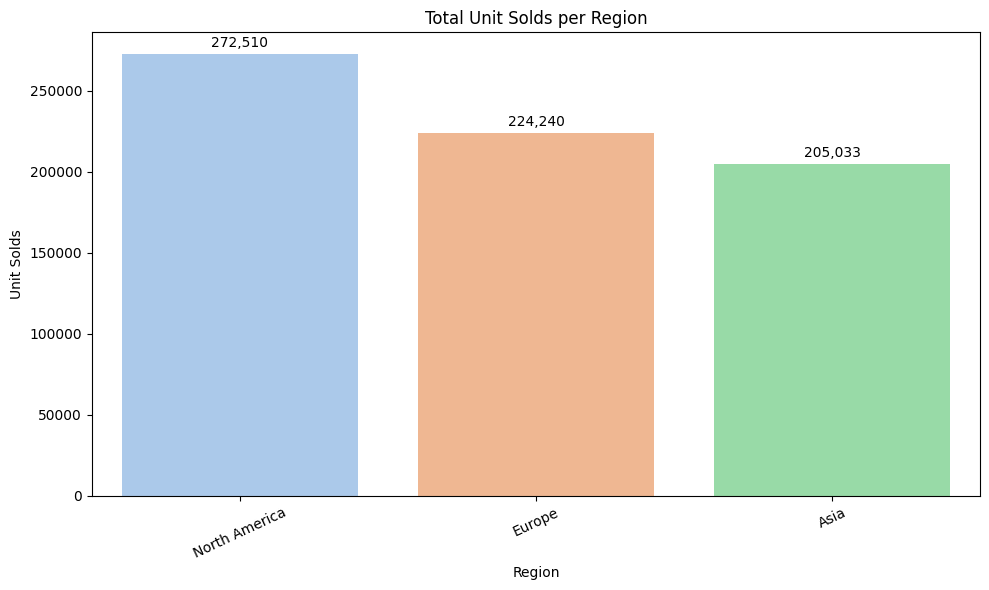

In [114]:
sold_region = df.groupby('region')['units_sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sold_region.index, y=sold_region.values, palette='pastel')

for i, v in enumerate(sold_region.values):
    plt.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Total Unit Solds per Region")
plt.xlabel("Region")
plt.ylabel("Unit Solds")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

## Total Revenue per Region

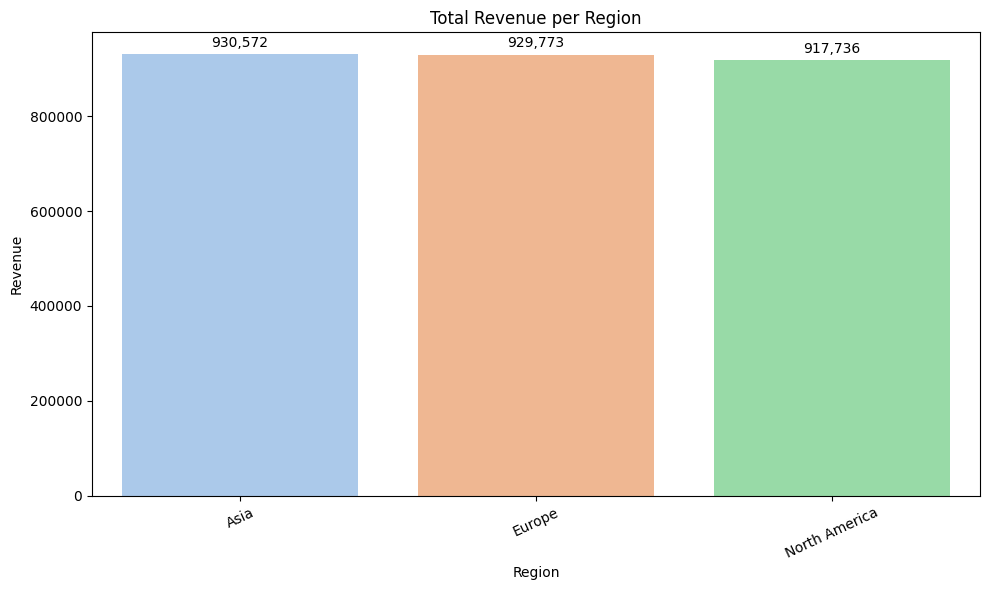

In [115]:
rev_region = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rev_region.index, y=rev_region.values, palette='pastel')

for i, v in enumerate(rev_region.values):
    plt.text(i, v + v*0.01, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

plt.title("Total Revenue per Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

## Insight (Region)

* North America sells the most units but has the lowest revenue → indicating a lower average price per unit.

* Asia sells fewer units but has the highest revenue, meaning that products that sell in Asia tend to be more premium or high-ticket.

## Recommendation

* Clothing is worth analyzing further because:

  The number of transactions is not the highest, but the revenue is very high -> large margin potential.

* Asia as a premium market:

  Although the unit sold is lower, the revenue contribution is very high -> may be suitable for a high-end / luxury product strategy.

* Maximize the Q3-Q4 moment:

  Very good performance is seen in August, October, and November -> can be focused on for big campaigns / promotions.

# EDA - Ad

## Total Ad Spend Trend

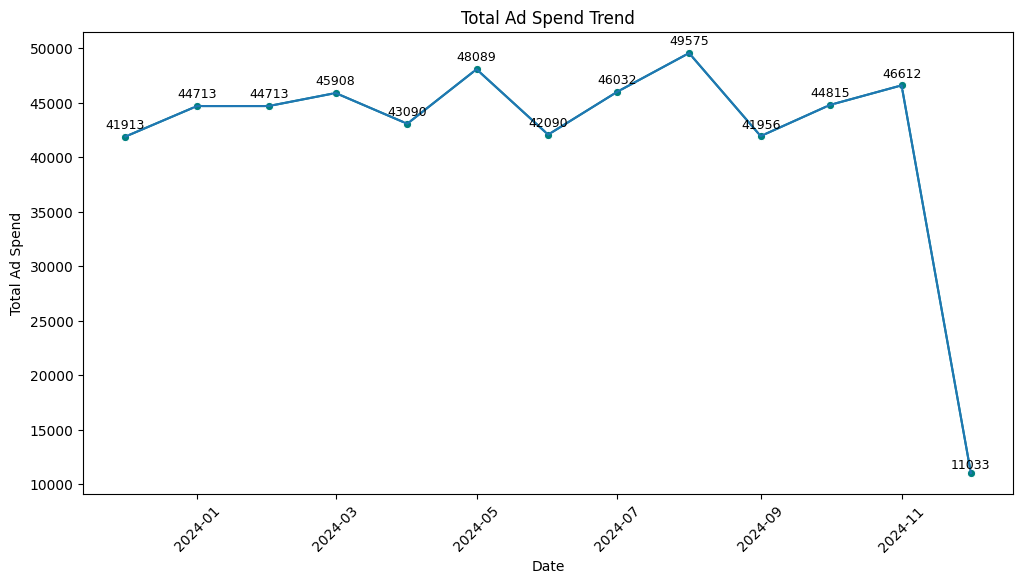

In [116]:
ad_spend = df.groupby('transaction_date_update')['ad_spend'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=ad_spend.index, y=ad_spend.values, marker='o', color='teal')

for x, y in zip(ad_spend.index, ad_spend.values):
    plt.text(x, y + y*0.01, f"{int(y)}", ha='center', va='bottom', fontsize=9)

sns.lineplot(x=ad_spend.index, y=ad_spend.values)
plt.title("Total Ad Spend Trend")
plt.xlabel("Date"); plt.ylabel("Total Ad Spend")
plt.xticks(rotation=45)
plt.show()

In [117]:
ad_spend.reset_index()

,transaction_date_update,ad_spend
0,2023-12-01,41913.22
1,2024-01-01,44713.11
2,2024-02-01,44713.72
3,2024-03-01,45908.91
4,2024-04-01,43090.03
5,2024-05-01,48089.13
6,2024-06-01,42090.44
7,2024-07-01,46032.90
8,2024-08-01,49575.15
9,2024-09-01,41956.51


## Conversion Rate Trend

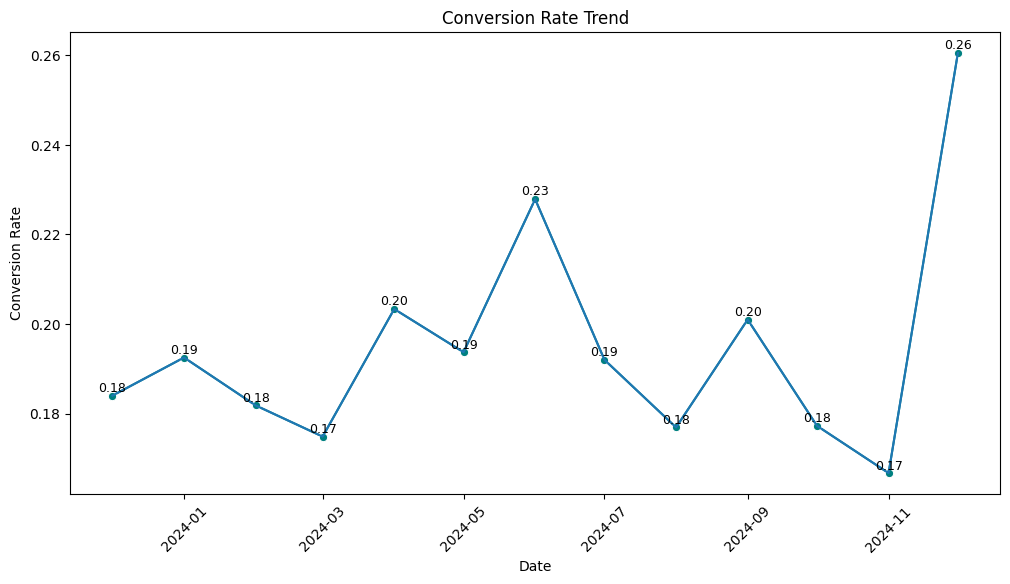

In [118]:
convert_rate = df.groupby('transaction_date_update')['conversion_rate'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=convert_rate.index, y=convert_rate.values, marker='o', color='teal')

for x, y in zip(convert_rate.index, convert_rate.values):
    plt.text(x, y + y*0.001, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

sns.lineplot(x=convert_rate.index, y=convert_rate.values)
plt.title("Conversion Rate Trend")
plt.xlabel("Date"); plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

In [119]:
convert_rate.reset_index()

,transaction_date_update,conversion_rate
0,2023-12-01,0.183995
1,2024-01-01,0.192506
2,2024-02-01,0.181807
3,2024-03-01,0.174844
4,2024-04-01,0.203342
5,2024-05-01,0.193698
6,2024-06-01,0.227887
7,2024-07-01,0.192000
8,2024-08-01,0.176899
9,2024-09-01,0.200988


## Click Trend

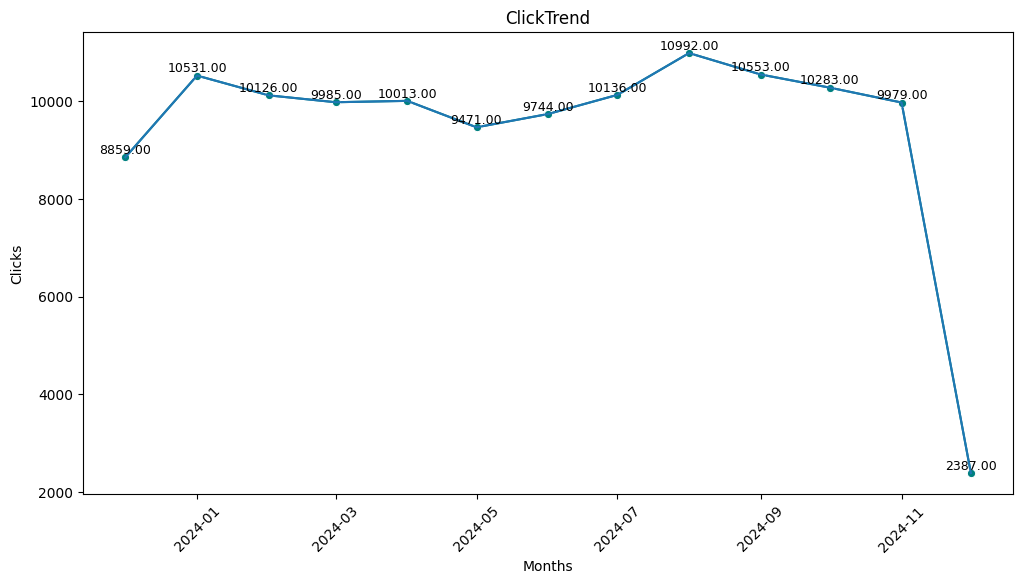

In [120]:
click_rate = df.groupby('transaction_date_update')['clicks'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=click_rate.index, y=click_rate.values, marker='o', color='teal')

for x, y in zip(click_rate.index, click_rate.values):
    plt.text(x, y + y*0.001, f"{y:.2f}", ha='center', va='bottom', fontsize=9)

sns.lineplot(x=click_rate.index, y=click_rate.values)
plt.title("ClickTrend")
plt.xlabel("Months")
plt.ylabel("Clicks")
plt.xticks(rotation=45)
plt.show()

In [121]:
click_rate.reset_index()

,transaction_date_update,clicks
0,2023-12-01,8859
1,2024-01-01,10531
2,2024-02-01,10126
3,2024-03-01,9985
4,2024-04-01,10013
5,2024-05-01,9471
6,2024-06-01,9744
7,2024-07-01,10136
8,2024-08-01,10992
9,2024-09-01,10553


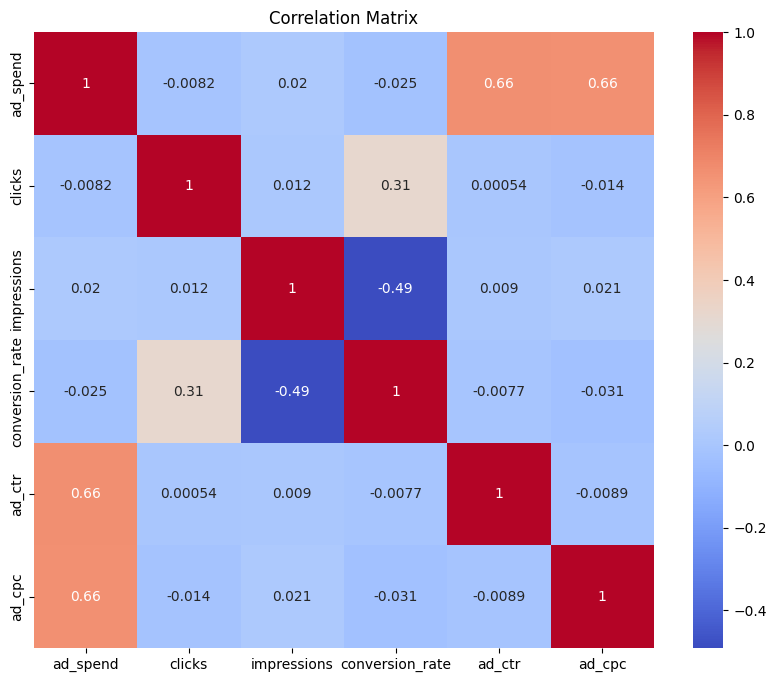

In [122]:
corr_ad = df[['ad_spend', 'clicks', 'impressions', 'conversion_rate', 'ad_ctr', 'ad_cpc']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_ad, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [123]:
corr_ad

,ad_spend,clicks,impressions,conversion_rate,ad_ctr,ad_cpc
ad_spend,1.000000,-0.008243,0.019594,-0.024871,0.662340,0.657674
clicks,-0.008243,1.000000,0.012454,0.314627,0.000536,-0.014462
impressions,0.019594,0.012454,1.000000,-0.491370,0.008971,0.020841
conversion_rate,-0.024871,0.314627,-0.491370,1.000000,-0.007719,-0.030571
ad_ctr,0.662340,0.000536,0.008971,-0.007719,1.000000,-0.008893
ad_cpc,0.657674,-0.014462,0.020841,-0.030571,-0.008893,1.000000


## Insight (Trend)

1. Clicks Trend
* The highest number of ad clicks occurred in August 2024 (10,992 clicks) which was also accompanied by the highest ad spend (49,575).

* December 2024 had the lowest clicks (2,387) despite having the highest conversion rate (26.0%). This means that the target audience is very potential even though traffic is low — most likely due to the holiday season or a specific campaign.

2. Ad Spend vs Clicks
* There is no linear correlation between ad spend and clicks. For example:

  May 2024 -> high ad spend (48,089) but only 9,471 clicks.

  July 2024 -> quite high ad spend (46,032) but clicks increased to 10,136.

* This implies that campaign strategy and content influence results more than just budget.

3. Conversion Rate is Stable, But Not Directly Related to Clicks
* Months with high clicks such as August or October do not necessarily have high conversions.

* Conversely, December with the lowest clicks actually had the highest conversions, which underscores the importance of segmentation and timing.

## Total Ad Spend per Region

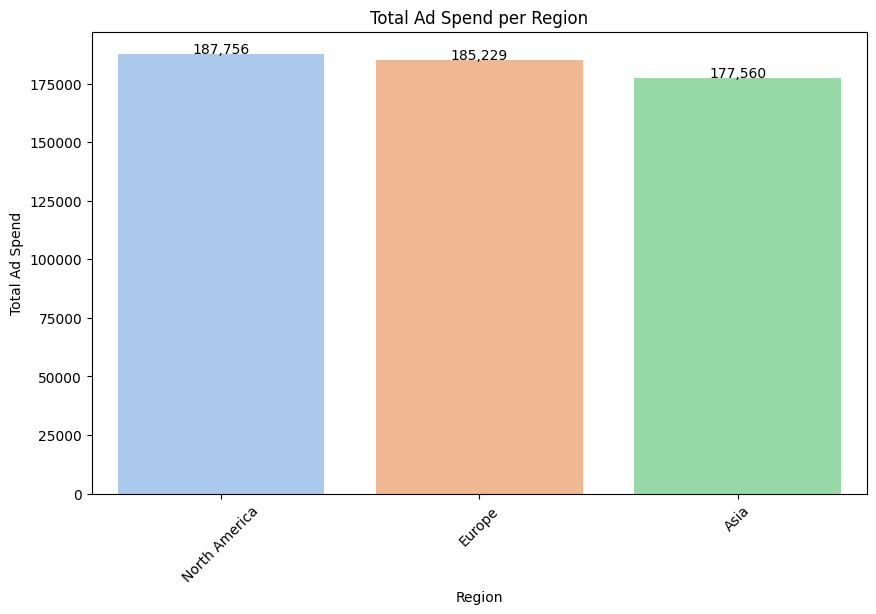

In [124]:
spend_region = df.groupby('region')['ad_spend'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=spend_region.index, y=spend_region.values, palette="pastel")

for i, v in enumerate(spend_region.values):
    plt.text(i, v + 0.01, f"{v:,.0f}", ha='center')

plt.title("Total Ad Spend per Region")
plt.xlabel("Region")
plt.ylabel("Total Ad Spend")
plt.xticks(rotation=45)
plt.show()

## Conversion Rate per Region

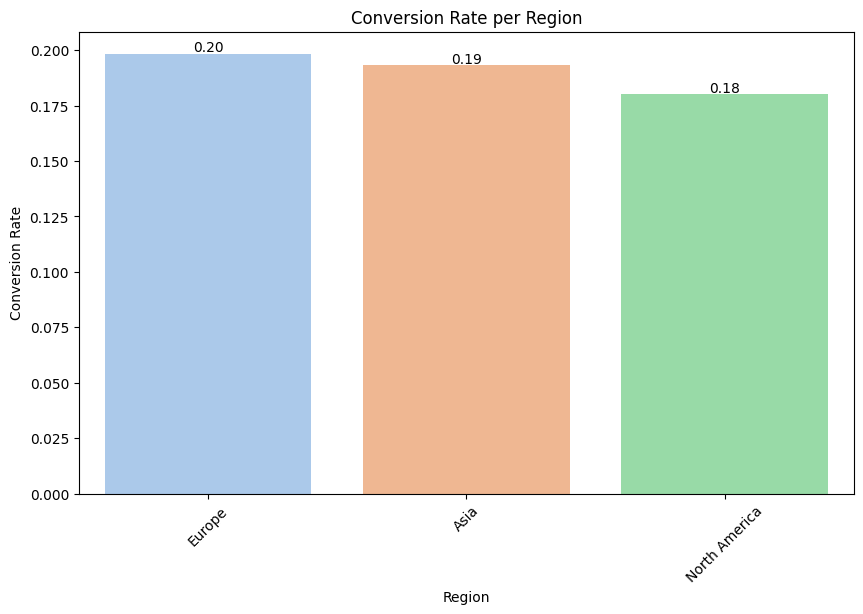

In [125]:
convert_region = df.groupby('region')['conversion_rate'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=convert_region.index, y=convert_region.values, palette="pastel")

for i, v in enumerate(convert_region.values):
    plt.text(i, v + 0.001, f"{v:,.2f}", ha='center')

plt.title("Conversion Rate per Region")
plt.xlabel("Region")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
plt.show()

## Clicks per Region

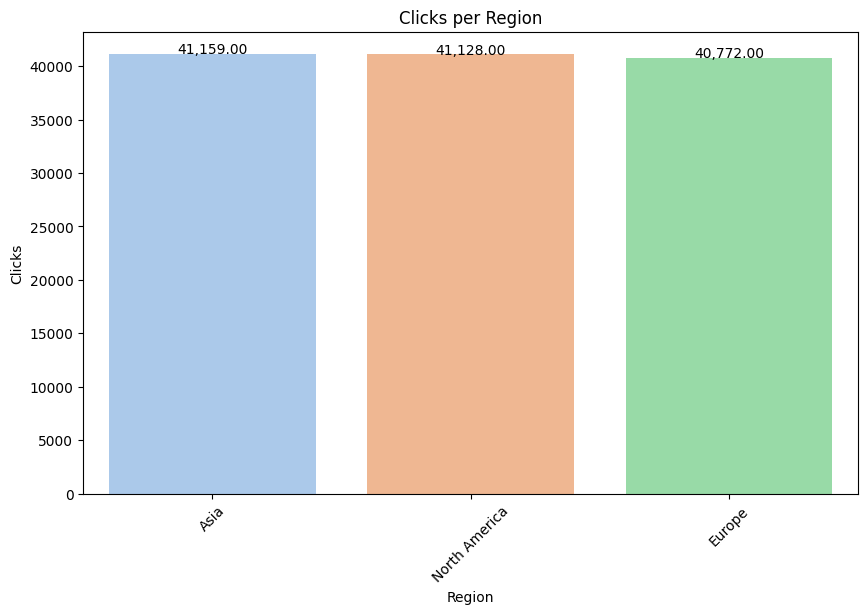

In [126]:
click_region = df.groupby('region')['clicks'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=click_region.index, y=click_region.values, palette="pastel")

for i, v in enumerate(click_region.values):
    plt.text(i, v + 0.001, f"{v:,.2f}", ha='center')

plt.title("Clicks per Region")
plt.xlabel("Region")
plt.ylabel("Clicks")
plt.xticks(rotation=45)
plt.show()

In [127]:
clicks_region.reset_index()

,region,clicks
0,Asia,41159
1,Europe,40772
2,North America,41128


## Insight (Ad - Region)

1. Asia is Most Efficient
* Asia has the lowest ad spend (177,559) compared to other regions, but has a conversion rate that is almost on par with Europe (19.3%).

* This shows that advertising campaigns in Asia are more efficient than those in North America and Europe.

2. North America is Less Effective
North America spends the most on advertising (187,755) but has the lowest conversion rate (17.9%).

3. Asia and North America Dominate Clicks

* Asia: 41,159 clicks

* North America: 41,128 clicks

* Europe: 40,772 clicks

All three are very balanced, but it is important to note:

* Asia has the lowest ad spend (177,559) and a higher conversion rate than North America (19.3% vs 17.9%) -> meaning Asia is more efficient in terms of ROI.

* Europe has the highest conversion rate (19.8%) -> campaign strategies in Europe are quite effective.

## Recommendation

1. Focus Campaigns on Asia and Europe

* Asia: High ROI (low cost, lots of clicks, good conversion).

* Europe: Highest conversion, although clicks are lower -> campaigns here are effective and audiences are more responsive.

2. Evaluate August & May Campaigns

* Despite high clicks and large budgets, conversion rates are low -> need to evaluate content and targeting.

3. Take Advantage of December Moments

* High conversion rates despite low clicks -> take advantage of seasonal campaigns and promote more aggressively to increase traffic without losing efficiency.

4. Optimize Cost per Click (CPC)

* Because CPC increases with ad spend, it is important to monitor the quality of leads, not just traffic.

5. Audit North America Strategy

* High clicks but low conversion, and the highest ad spend → need to optimize the funnel or retarget.